In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd



In [3]:
data_train=pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")
data_test=pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")

In [4]:
# In this section you will have to add another dimension to the data


training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


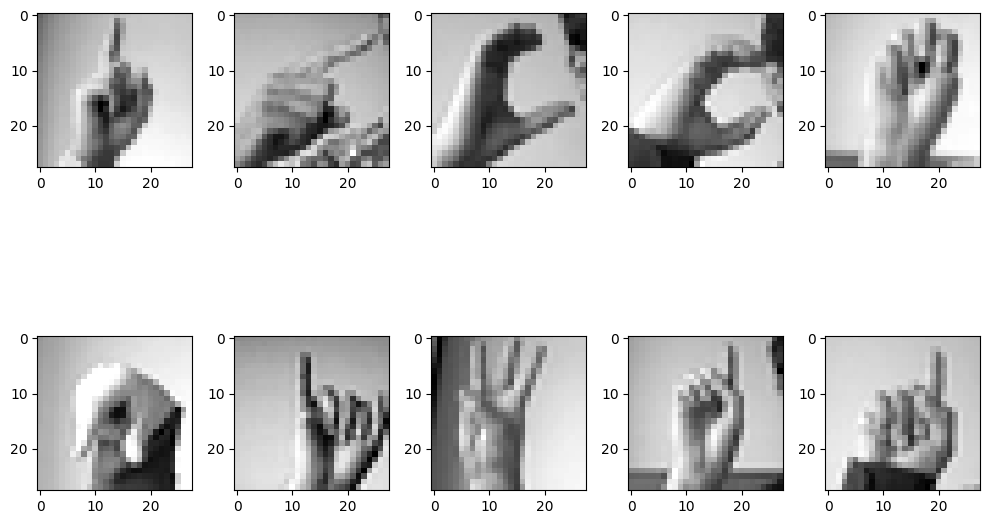

In [5]:
# Plotting the first 10 images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5)
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [6]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)

# Keep These
print(training_images.shape)
print(testing_images.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10


<ipython-input-7-f3f5721b4c76>:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),


857/857 [==============================] - 39s 43ms/step - loss: 2.7031 - accuracy: 0.1752 - val_loss: 1.8859 - val_accuracy: 0.3839
Epoch 2/10
857/857 [==============================] - 40s 46ms/step - loss: 1.9118 - accuracy: 0.3924 - val_loss: 1.1242 - val_accuracy: 0.6235
Epoch 3/10
857/857 [==============================] - 39s 45ms/step - loss: 1.4956 - accuracy: 0.5149 - val_loss: 1.0021 - val_accuracy: 0.6358
Epoch 4/10
857/857 [==============================] - 42s 49ms/step - loss: 1.2499 - accuracy: 0.5905 - val_loss: 0.8360 - val_accuracy: 0.7029
Epoch 5/10
857/857 [==============================] - 37s 43ms/step - loss: 1.0619 - accuracy: 0.6506 - val_loss: 0.5696 - val_accuracy: 0.7960
Epoch 6/10
857/857 [==============================] - 39s 45ms/step - loss: 0.9245 - accuracy: 0.6970 - val_loss: 0.5901 - val_accuracy: 0.7924
Epoch 7/10
857/857 [==============================] - 37s 43ms/step - loss: 0.8307 - accuracy: 0.7256 - val_loss: 0.4434 - val_accuracy: 0.8496
Epo

[135.66510009765625, 0.6759620904922485]

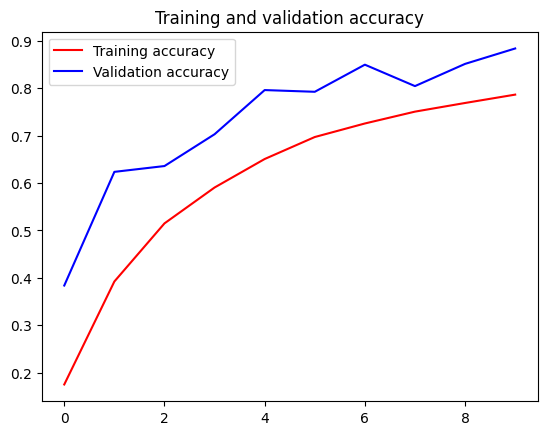

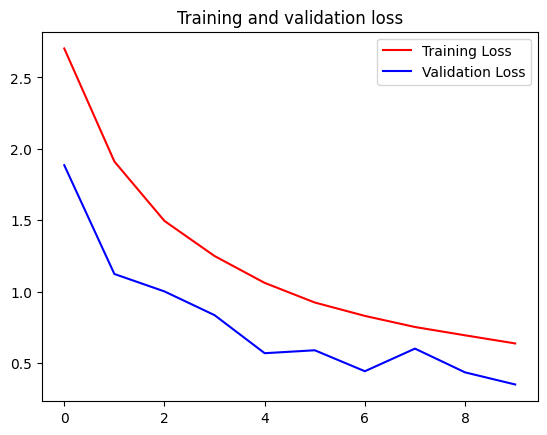

In [8]:
#accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

225/225 [==============================] - 2s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

     Class 0       0.90      0.68      0.78       331
     Class 1       1.00      0.80      0.89       432
     Class 2       0.88      0.52      0.65       310
     Class 3       0.63      0.44      0.52       245
     Class 4       0.68      0.84      0.75       498
     Class 5       0.82      1.00      0.90       247
     Class 6       0.89      0.57      0.69       348
     Class 7       0.82      0.54      0.65       436
     Class 8       0.97      0.92      0.94       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.02      0.01      0.01       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.00      0.00      0.00       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      0.00       144
    Class 18       0.00    

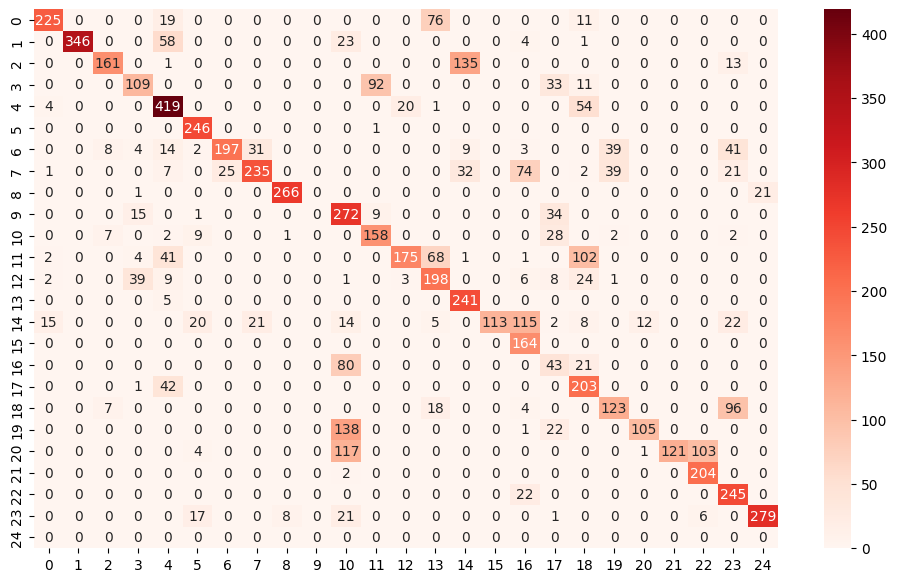

In [9]:
# Predictions
predictions = model.predict(testing_images)
predictions = np.argmax(predictions, axis=-1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(data_test['label'], predictions, target_names = classes))


# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,
           fmt='')

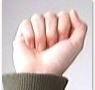

1/1 [==============================] - 0s 33ms/step
Predicted sign label: A


In [18]:
 import cv2
 from google.colab.patches import cv2_imshow
def predict_sign_language(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image1 = cv2.imread(image_path)
    cv2_imshow(image1)
    # Preprocess the image
    image = cv2.resize(image, (28, 28))
    image = image.reshape(-1, 28, 28, 1)
    image = image.astype('float32') / 255.0 # Normalize
    # Make predictions
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)
    # Map the predicted class to the sign label
    sign_label = chr(predicted_class + 65) # Assuming classes are represented as letters (A-Z)
    print("Predicted sign label:", sign_label)

image_path = '/content/drive/MyDrive/amer_sign2.png'
predict_sign_language(image_path)
